# Demonstration

The goal of this notebook is to show some visuals made possible by Tableau on different datasets. Each data sets will be quickly explored and then the visuals will be provided. The data sets are downloaded from [SuperDataScientist website](https://www.superdatascience.com/tableau/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Story 1: How are sales rep doing?

This is a very simple data set consisting of 42 rows and 6 columns. It consists of the data for sales of different sales rep. Our goal is to select the best sales reps in each region.

In [2]:
reps = pd.read_csv('data/OfficeSupplies.csv')

In [3]:
reps.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95


In [4]:
regions = reps.Region.unique()
region_name = ", ".join(regions)
print("There are {} regions in the data set:".format(len(regions)))
print(region_name)

There are 3 regions in the data set:
East, Central, West


> Let's see sumamry statistics for how each rep is doing in each region based on their abour of sales. We first need to add a new column that has the sales value.

In [5]:
reps['Sales'] = round(reps['Units'] * reps['Unit Price'] / 1000,1)
rep_sales = reps[['Region','Rep','Sales']].groupby(['Region','Rep'])['Sales'].sum()
rep_sales_sorted = rep_sales.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False))
rep_sales_sorted

Region   Rep    
Central  Matthew    3.1
         Alex       2.8
         Bill       1.7
         Smith      1.6
         Morgan     1.4
         Rachel     0.3
East     Susan      3.1
         Richard    2.4
         Nick       0.6
West     James      1.3
         Thomas     1.2
Name: Sales, dtype: float64

> Now that we performed groupby within groups, let's visually see the results in Tableau. We only need to develope a calculated field, and calculate the total sales. Then we use ``Region`` and ``Rep`` as columns, and ``Total_sales`` as the row. Please scroll to the right to see the whole view.

Following is a snapshot of Tableau worksheet. This Tableau file can be accessed [here](https://us-east-1.online.tableau.com/t/amnghd/views/Rep_ranking/BestSalesRep?iframeSizedToWindow=true&:embed=y&:showAppBanner=false&:display_count=no&:showVizHome=no).

<img src="Images/reps.png">

# Story 2: Unemployment Statistics

This data consists of unemployment counts for year 2005 to 2015 for different demographics in the US. Let's take a look at the data. We are interested in seeing how the unemployment has changed over time.

In [6]:
unemployment = pd.read_excel('data/Long-Term-Unemployment-Statistics.xlsx')
unemployment['Age'] = unemployment['Age'].apply(lambda x: x.split(' y')[0]) # taking "years" out of the columns
unemployment['Period'] = pd.to_datetime(unemployment['Period'], format="Y-M-D") # converting data to datetime
unemployment.set_index('Period', inplace=True)
unemp_pivot = unemployment.pivot_table(index='Period',columns='Age', values='Unemployed',aggfunc='sum')

Text(0,0.5,'Unemplyment')

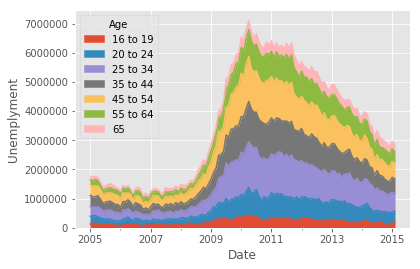

In [7]:
unemp_pivot.plot.area()
plt.xlabel('Date')
plt.ylabel('Unemplyment')

We can approach to a similar plot in Tablea, with more details and better representation. Following is a snapshot of Tableau worksheet. This Tableau file can be accessed [here](https://us-east-1.online.tableau.com/t/amnghd/views/Unemployed/Unemployed?iframeSizedToWindow=true&:embed=y&:showAppBanner=false&:display_count=no&:showVizHome=no).

<img src="Images/unemployment.png">

> We get to a similar result. However, if you refer to the link, Tableau allows us to easily filter for Gender, easily using a dropdown botton. Also annotation is much more intunitive using Tableau.

# Story 3: Does sale meet expectations?

We have two datasets for the sales of a retailer for different departments. There is also another dataset that consist of monthly target. We need to join the dataframes, and compare the monthly sales with the target sales. We use both tableau and matplotlib. On tableau we will use dual axis and make sure that the axes are syncrhonized.

In [8]:
orders = pd.read_excel("data/AmazingMartEU2.xlsx",sheet_name = 'ListOfOrders')
orderBD = pd.read_excel("data/AmazingMartEU2.xlsx",sheet_name = 'OrderBreakdown')
target = pd.read_excel("data/AmazingMartEU2.xlsx",sheet_name = 'SalesTargets')

In [9]:
orders.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England
4,AZ-2011-617423,2011-01-05,Daniel Burke,Echirolles,France,Central,Home Office,2011-01-07,Priority,Auvergne-Rhône-Alpes


In [10]:
orderBD.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [11]:
target.head()

,Month of Order Date,Category,Target
0,2011-01-01,Furniture,10000
1,2011-02-01,Furniture,10100
2,2011-03-01,Furniture,10300
3,2011-04-01,Furniture,10400
4,2011-05-01,Furniture,10500


From the order data, we are interested in order date, and the amount of sale, and from the order breakdown data we are intrested in category and date of sale.

In [12]:
sales = orders.merge(orderBD, on = 'Order ID', how = 'inner')[['Sales','Category','Order Date']]
sales.head()

,Sales,Category,Order Date
0,45,Office Supplies,2011-01-01
1,854,Furniture,2011-01-03
2,140,Office Supplies,2011-01-04
3,27,Office Supplies,2011-01-04
4,17,Office Supplies,2011-01-04


In [13]:
sales['Date'] = pd.to_datetime(sales['Order Date'],format='Y-M-D')
sales.drop('Order Date', axis=1,inplace=True)
sales_pivot = sales.pivot_table(index='Date', columns='Category', values='Sales',aggfunc='sum')
sales_pivot = sales_pivot.fillna(0)

In [14]:
sales_monthly = sales_pivot.resample('MS').sum() # aggregating all sales to the beginning of the month

In [15]:
target_monthly = target.pivot_table(index='Month of Order Date', columns='Category', values='Target',aggfunc='sum').reset_index()
target_monthly['Date'] = target_monthly['Month of Order Date']
target_monthly['Date'] = pd.to_datetime(target_monthly['Date'] ,format='Y-M-D') #getting datetime object for time-series manipulation
target_monthly = target_monthly.drop('Month of Order Date',axis=1)
target_monthly.set_index('Date',inplace=True)
target_monthly.head()

Category,Furniture,Office Supplies,Technology
Date,,,
2011-01-01,10000,5000,9000
2011-02-01,10100,5000,9000
2011-03-01,10300,5000,9000
2011-04-01,10400,10000,9000
2011-05-01,10500,10000,9000


In [16]:
excess_of_target = pd.DataFrame(index=sales_monthly.index.values, columns=sales_monthly.columns.values)

for col in excess_of_target.columns.values:
    excess_of_target[col] = sales_monthly[col] - target_monthly[col]

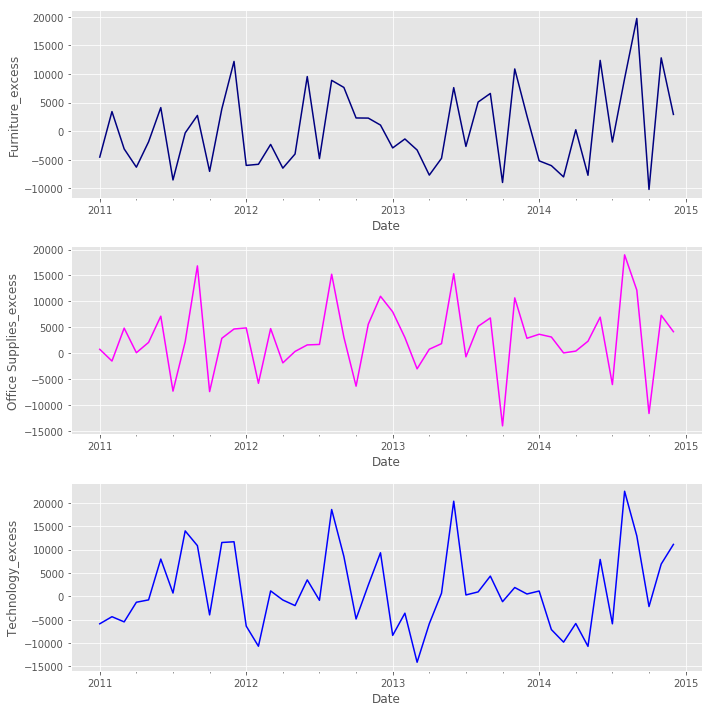

In [17]:
plt.figure(figsize=(10,10))
for i in range(1,4):
    plt.subplot(310+i)
    color = ['navy','magenta','blue']
    column = excess_of_target.columns.values[i-1]
    excess_of_target[column].plot(color = color[i-1])
    plt.ylabel(column+"_excess")
    plt.xlabel('Date')
    plt.tight_layout()

The graphs above show how much excess of target each division has. Doing this in Pandas and Matplotlib took me around 3 hours. However, doing the same and more in Tableau took less than 30 minutes. Tableau starts to demonstrate strength as the analysis get more complicated.

With the same data, the following graph demonstrates monthly sales vs its target (in transparent grey).
<img src="Images/target_sales.png">

We can go more grannular and check the excess of return vs sales and target for each division. For example, the following demonstrates the excess of target for furniture department.
<img src="Images/furniture.png">

The Tableau file for these graphs are available [here](https://us-east-1.online.tableau.com/t/amnghd/views/Salesvstarget/TargetMeeting?iframeSizedToWindow=true&:embed=y&:showAppBanner=false&:display_count=no&:showVizHome=no).

# Story 4: Startup Comparison

In this section we will focus on the sales for an imaginary startup that sales lundary services. We would like to compare the sales between two regions. Let's first import the data. We would like to compare the results of two regions based on the ``ROMI`` (return of marketing investment) criteria.

In [18]:
startup = pd.read_excel("data/StartupExpansion.xlsx",sheet_name = 'Sheet1')

In [19]:
startup['romi'] = startup['Revenue'] / startup['Marketing Spend']

In [20]:
startup.groupby('Sales Region')['romi','Marketing Spend','Revenue' ].mean()

,romi,Marketing Spend,Revenue
Sales Region,,,
Region 1,14.204315,2889.000000,40567.203125
Region 2,13.401062,2896.232558,38359.465116


Now we have a high level perspective about the marketing behaviour each region. Now, we would like to visualize this on the United States map. This is quite challenging task using Matplitlib. However, this can be done quite easily using Tableau:

<img src="Images/ROMI.png">

The trick here is that we need to make a hierarchical geographical teritory (customer teritory). 

### Clustering sales-revenue:

Next, we would like to see if the revenue vs marketing is clustered based on the population of each region. With Tableau, we can easily do this using clustering tab in Analytics. We do this using population, revenue, and marketing. This is a graph of the result using Tableau:

<img src="Images/clusters.png">

These clusters have some interesting features. We would like to replicate this using matplotlib. First let's introduce a new data set that has us populaton and merge that to our data set. Since multiple cities in US have the same name, we need to make sure that the we also merge using the state name.

In [21]:
city = pd.read_csv("data/US_Cities_Population.csv",encoding = "ISO-8859-1")
col2keep = ['City', 'State', '2015 estimate']
city = city [col2keep]

In [22]:
city.head()

,City,State,2015 estimate
0,New York,New York,8550405
1,Los Angeles,California,3971883
2,Chicago,Illinois,2720546
3,Houston,Texas,2296224
4,Philadelphia,Pennsylvania,1567442


In [23]:
startup_location = city.merge(startup, on = ['City', 'State'], how='inner')
startup_location.head()

,City,State,2015 estimate,Store ID,Sales Region,New Expansion,Marketing Spend,Revenue,romi
0,San Bernardino,California,216108,45,Region 2,Old,3399,59870,17.614004
1,Spokane,Washington,213272,3,Region 2,Old,2768,49554,17.902457
2,Birmingham,Alabama,212461,7,Region 1,Old,3110,60338,19.401286
3,Modesto,California,211266,22,Region 2,Old,3077,56836,18.471238
4,Des Moines,Iowa,210330,133,Region 1,Old,2995,57432,19.175960


Text(0,0.5,'Revenue(M$)')

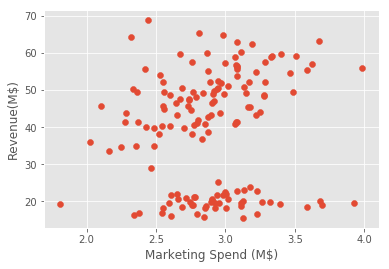

In [24]:
plt.scatter(startup_location['Marketing Spend'] / 1000, startup_location['Revenue'] / 1000)
plt.xlabel("Marketing Spend (M$)")
plt.ylabel('Revenue(M$)')

Havent still see the clusters. Let's use a clustering algorithm (k-means clustering).

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmean = KMeans(n_clusters=3)
clusters = kmean.fit_predict(startup_location[['Marketing Spend','Revenue','2015 estimate']])

Text(0,0.5,'Revenue(M$)')

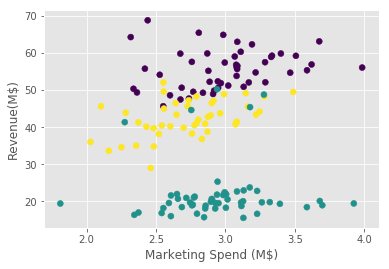

In [27]:
plt.scatter(startup_location['Marketing Spend']/1000,startup_location['Revenue']/1000,c=clusters)
plt.xlabel("Marketing Spend (M$)")
plt.ylabel('Revenue(M$)')

We recieved to the same clusters as the one that Tableau produced.
Let's check the ROMI median for different clusters.

<img src="Images/romi_clusters.png">

In [28]:
cluster_map = {0: "Cluster2", 1: "Cluster3", 2: "Cluster1"}
startup_location['Clusters'] = [cluster_map[k] for k in clusters]

In [29]:
romi_clusters = startup_location.groupby(['Clusters']).romi.median()
romi_clusters

Clusters
Cluster1    15.143990
Cluster2    17.898329
Cluster3     6.984642
Name: romi, dtype: float64

Text(0,0.5,'ROMI')

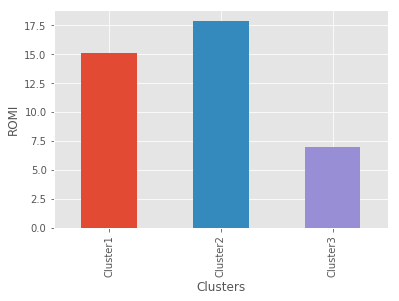

In [30]:
romi_clusters.plot(kind = 'bar')
plt.ylabel('ROMI')